In [2]:
import numpy as np   # Importamos librerias de calculo
import pandas as pd  # Importamos librerias de uso de tablas o dataframes
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Superstore.csv")  # Leer el archivo


In [3]:
df.head() # Para ver como se compone la base de datos.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Country', 'Postal Code', 'Ship Date', 'Order Date'], axis = 'columns', inplace=True) 
# Eliminamos columnas que no vamos a utilizar en el analisis

In [5]:
df.sample(2)

,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7549,First Class,Elizabeth Moffitt,Corporate,Houston,Texas,Central,FUR-FU-10004671,Furniture,Furnishings,"Executive Impressions 12"" Wall Clock",21.204,3,0.6,-11.6622
2426,Standard Class,Susan Vittorini,Consumer,Fairfield,Ohio,East,OFF-FA-10002975,Office Supplies,Fasteners,Staples,39.312,13,0.2,12.7764


### A) DATA WRANGLING

In [6]:
# Hacemos este chequeo para ver si hay algun valor NAN en el dataframe, si sale TRUE quiere decir que si hay al menos un valor
# NAN y deberemos verificar como resolverlo tambien.
check_for_nan = df.isnull().values.any()
print (check_for_nan)

False


In [7]:
df.isnull().sum() # Otra forma de corroborar que no faltan datos, nos muestra la suma de valores que faltan.

Ship Mode        0
Customer Name    0
Segment          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### B) VISUALIZANDO LAS VARIABLES
#### Para asi entender como estan distribuidos los datos, elegimos algunos campos representativos y vemos la representación grafica del mismo.

In [8]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

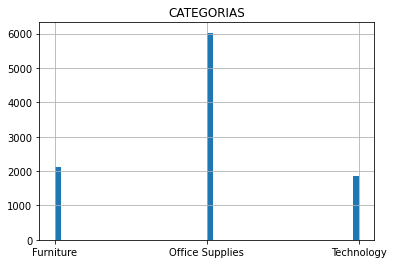

<Figure size 432x288 with 0 Axes>

In [9]:
df['Category'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('CATEGORIAS')
plt.grid(True)
plt.show()
plt.clf()

In [10]:
df.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

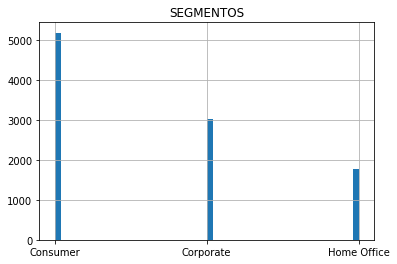

<Figure size 432x288 with 0 Axes>

In [11]:
df['Segment'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('SEGMENTOS')
plt.grid(True)
plt.show()
plt.clf()

In [12]:
df.Discount.value_counts()

0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

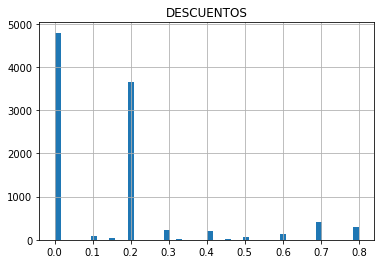

<Figure size 432x288 with 0 Axes>

In [13]:
df['Discount'].hist(bins=50) # Vemos graficamente a su distribución
plt.title('DESCUENTOS')
plt.grid(True)
plt.show()
plt.clf()

### C) CONTINUANDO CON EL ANALISIS

In [14]:
df.dtypes 

Ship Mode         object
Customer Name     object
Segment           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [15]:
df.corr()         # Calcula la correlacion entre todas las variables del dataframe

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


(0.0, 26.906471190560357)

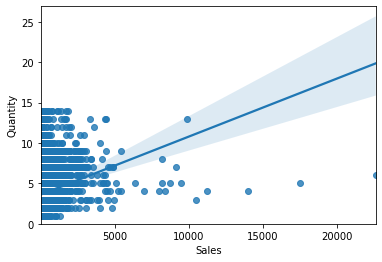

In [16]:
sns.regplot(x="Sales", y="Quantity", data=df)   # Para hacer un grafico y ver la correlación que hay de forma grafica
plt.ylim(0)

(0.0, 0.8517429806671447)

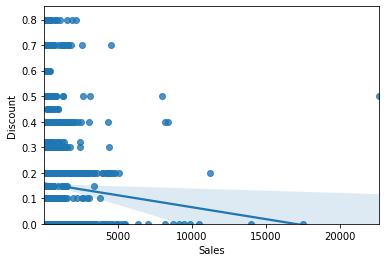

In [17]:
sns.regplot(x="Sales", y="Discount", data=df)   # Para hacer un grafico y ver la correlación que hay de forma grafica
plt.ylim(0)

(0.0, 9149.9737)

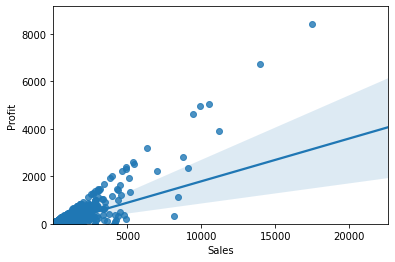

In [18]:
sns.regplot(x="Sales", y="Profit", data=df)   # Para hacer un grafico y ver la correlación que hay de forma grafica
plt.ylim(0)

### Entre Sales y Profit hay una pequeña correlación, para confirmar y practicar aplico un mapa de calor para verlo desde otra perspectiva y ver cuales estan interrelacionadas.

In [19]:
Cormat = df.corr()
Cormat

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

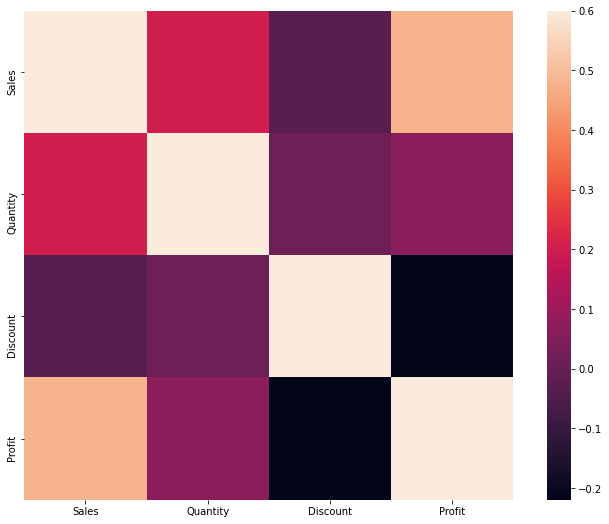

In [20]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(Cormat, vmax=.6, square=True)
# vmax: Hasta donde llega el gradiente, el difuminado de color, si fuera 1 seria hasta ser totalmente blanco.

# Interpretación: Mientras mas claro sean los colores, mayor correlación habra entre variables.

In [21]:
sns.set() # Le decimos a Seaborn que grafique con la configuracion de defecto.

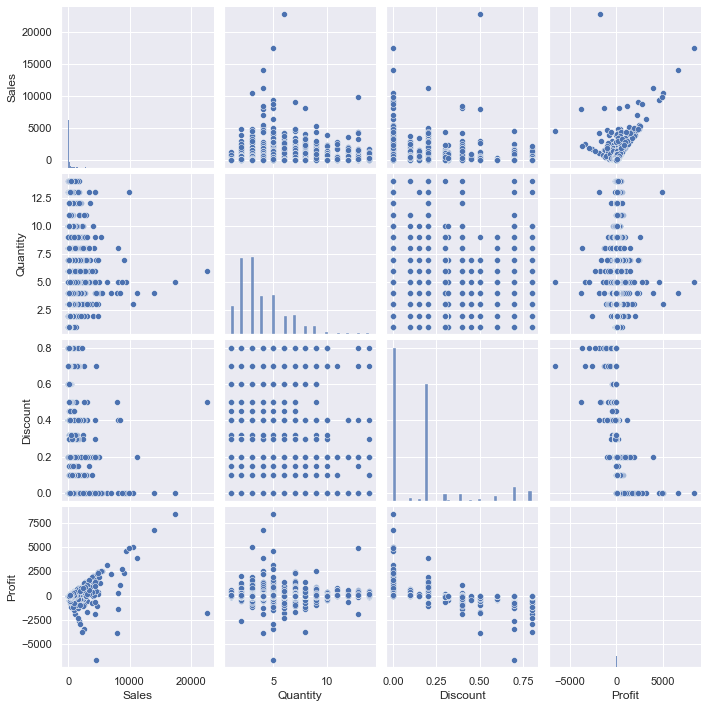

In [22]:
cols = ["Sales", "Quantity", "Discount", "Profit"]

sns.pairplot(df[cols], height=2.5)
plt.show()

Text(0.5, 0, 'Profit')

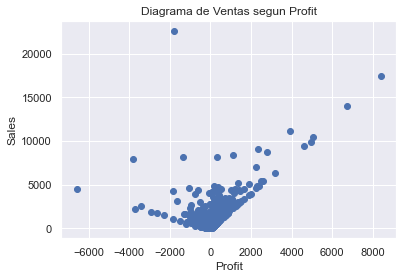

In [23]:
y=df ["Sales"]
x=df ["Profit"]
plt.scatter(x,y)

plt.title("Diagrama de Ventas segun Profit")  # Hacemos un diagrama de dispersión segun las variables definidas.
plt.ylabel("Sales")
plt.xlabel("Profit")

# Correlación de Pearson

### PEARSON = 1: Correlación lineal perfectamente positiva.
### PEARSON = 0: No hay relación lineal, las 2 variables no se afectan una a otra.
### PEARSON =-1: Perfectamente negativa seria la correlación lineal.

# P-VALUE

### P-Value  <  0.001: Fuerte evidencia de que la correlación es significante.
### P-Value  <  0.05: Moderada evidencia de que la correlación es significante.
### P-Value  <  0.1: Debil evidencia de que la correlación es significante.
### P-Value  >  0.1: No hay evidencia de que la correlación es significante.

In [23]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Sales'], df['Profit'])
print("La correlacion de Pearson tiene un coeficiente de", pearson_coef, " con un P-Value de P =", p_value) 

La correlacion de Pearson tiene un coeficiente de 0.4790643497377067  con un P-Value de P = 0.0


In [24]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [25]:
X = df[['Sales']]
Y = df['Profit']

In [26]:
lm.fit(X,Y) # Entrenamos el modelo

LinearRegression()

In [27]:
Yhat=lm.predict(X)
Yhat[0:5]

array([ 34.43739621, 119.065127  , -10.10029249, 159.69491892,
        -8.70513597])

In [28]:
lm.intercept_

-12.732867116682826

In [29]:
lm.coef_

array([0.18006666])

#### Nos dice que sera una regresión lineal con la formula Y=a+bX, donde a=intercept y donde b=coef que seria como decir
#### Profit = -12.732867 + 0.18006666xSales
#### Con esta formula podremos predecir una linea de tendencia y el precio dado ciertos valores

(0.0, 24329.01675236905)

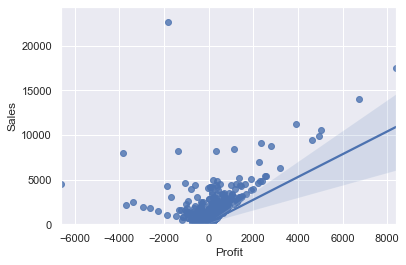

In [30]:
sns.regplot (x="Profit", y="Sales", data=df)
plt.ylim (0, )


c:\users\hector\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


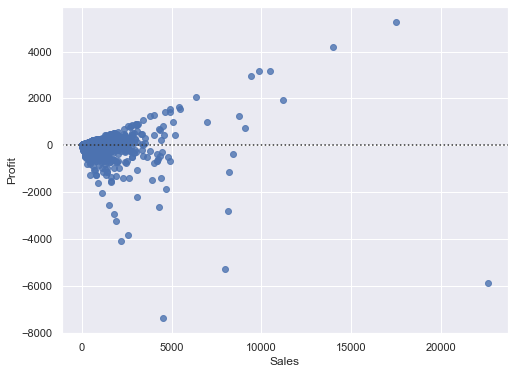

In [31]:
# Residual Plot: Como la distribución de los valores no es aleatoria, esto sugiere que la suposición lineal es no sera correcta.

width = 8
height = 6
plt.figure(figsize=(width, height))
sns.residplot(df['Sales'], df['Profit'])
plt.show()

In [32]:
lm.predict(X)

array([ 34.43739621, 119.065127  , -10.10029249, ...,  33.82805062,
        -7.40289386,  31.05214292])

#### PREDICCION 1°: Por ejemplo buscamos predecir cuantas ventas van a otorganr un profit de 1000.

In [33]:
Prediccion = -12.732867 + 0.18006666*1000
"Por cada 1000 Ventas (Sales) obtenemos un", Prediccion, "de Profit"

('Por cada 1000 Ventas (Sales) obtenemos un', 167.333793, 'de Profit')

#### Ahora intentamos sacar una correlación de multiples variables tomando valores de 3 columnas.

In [34]:
lm2 = LinearRegression()

Z = df[["Discount", "Profit", "Quantity"]]

lm2.fit(Z, df["Sales"])  # Entrenamos el modelo

Yhat=lm2.predict(Z)       # Obtenemos la predicción

In [35]:
lm2.intercept_

-21.639018033198425

In [36]:
lm2.coef_

array([231.73990717,   1.28975366,  47.06024734])

#### Sales (Vemtas) = -21.6390180 + 231.7399xDiscount + 1.28975366xProfit + 47.060247xQuantity
#### Esta es la formula obtenida para predecir la cantidad de Sales segun los demas valores del dataset.

#### PREDICCION 2°: Buscamos predecir cuantas Sales se obtienen cuando hay 100 de discount, 1000 de profit y 1000 de quantity.

In [37]:
Prediccion = -21.6390180 + (231.7399*100)+(1.28975366*1000)+(47.060247*1000)
"Cuando hay valores de 100 de discount, 1000 de profit y 1000 de quantity, se obtienen", Prediccion, "de ventas (sales)"

('Cuando hay valores de 100 de discount, 1000 de profit y 1000 de quantity, se obtienen',
 71502.351642,
 'de ventas (sales)')

In [24]:
# Graficando una regresion de multiples variables

Y_hat = lm2.predict(Z)

NameError: name 'lm2' is not defined

In [ ]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['Sales'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Valores Buscados" , ax=ax1)


plt.title('Ventas vs Profit')
plt.xlabel('Profit')
plt.ylabel('Sales')

plt.show()
plt.close()

## Algoritmos de Arboles de Decisión:
#### Importamos inicialmente las librerias y modulos que vamos a utilizar, luego importamos otras mas.

In [26]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [28]:
df.head()

,Ship Mode,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [30]:
df.dtypes # Analizando la base de datos y su composición.

Ship Mode         object
Customer Name     object
Segment           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

#### Para poder usar los siguientes algoritmos, necesitamos convertir las variables categoricas en numericas, utilizo OneHot Encoding

In [33]:
# Cargamos los datos y los dividimos en conjuntos para entrenar y testear.
data = df
y = data["Profit"]
X = data.drop(["Profit"], axis=1)
(X_train, X_test,
 y_train, y_test) = train_test_split(X,
                                     y,
                                     stratify=y,
                                     test_size=0.33,
                                     random_state=11)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [32]:
# Primero creamos un arbol de decisión para ver la precisión y poder compararla
tree = DecisionTreeClassifier(max_depth=4, random_state=11) # Max depth acorta el arbol si no salia muy grande.
tree.fit(X_train, y_train)
print(f"La precisión del Arbol de decisión es de: {tree.score(X_test, y_test)}")

ValueError: could not convert string to float: 'Second Class'